In [86]:
import result_analization.load_test_result as ltr
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd

In [87]:
path = "/Users/nduginets/PycharmProjects/master-diploma/tmp_data/classifiers"

In [88]:
#pix2pix20 = ltr.get_vals(path, "pix_2pix_classifier_20")
#pix2pix50 = ltr.get_vals(path, "pix_2pix_classifier_50")
pix2pix80 = ltr.get_vals(path, "pix_2pix_classifier_80")

pix2pix120 = ltr.get_vals(path, "pix_2pix_classifier_120")
pix2pix150 = ltr.get_vals(path, "pix_2pix_classifier_150")
pix2pix180 = ltr.get_vals(path, "pix_2pix_classifier_180")

datasets = [
    #("pix2pix20", pix2pix20),
    #("pix2pix50", pix2pix50),
    ("pix2pix80", pix2pix80),
    #("pix2pix120", pix2pix120),
    # ("pix2pix150", pix2pix150),
    ("pix2pix180", pix2pix180),
]
default_data_bussio = ltr.create_dataset(datasets)

In [89]:
#pix2pix20 = ltr.get_vals(path, "boxed_pix_2pix_classifier_20")
#pix2pix50 = ltr.get_vals(path, "boxed_pix_2pix_classifier_50")
pix2pix80 = ltr.get_vals(path, "boxed_pix_2pix_classifier_80")

#pix2pix120 = ltr.get_vals(path, "boxed_pix_2pix_classifier_120")
pix2pix150 = ltr.get_vals(path, "boxed_pix_2pix_classifier_150")
pix2pix180 = ltr.get_vals(path, "boxed_pix_2pix_classifier_180")

datasets = [
    #("boxed_pix2pix20", pix2pix20),
    #("boxed_pix2pix50", pix2pix50),
    ("boxed_pix2pix80", pix2pix80),
    #("boxed_pix2pix120", pix2pix120),
    #("boxed_pix2pix150", pix2pix150),
    ("boxed_pix2pix180", pix2pix180),
]
boxed_data_bussio = ltr.create_dataset(datasets)

In [90]:
classifier = ltr.get_vals(path, "classifier_")

datasets = [
    ("classifier", classifier)
]
classifier_bussio = ltr.create_dataset(datasets)

In [91]:
def get_last_values(dataset_to_fetch, *args):
    result = []
    for (name, data) in dataset_to_fetch:
        values_to_return = []
        latest_epoch = max([max(list(map(lambda x: x, launch.keys()))) for launch in data])
        for launch in data:
            if latest_epoch not in launch:
                continue
            initial_node = launch[latest_epoch]
            for p in args:
                initial_node = initial_node[p]
            values_to_return.append(initial_node)
        result.append((name, values_to_return))
    return result

In [92]:
def calculate_var(dataset_prepared):
    result = []
    for (name, data) in dataset_prepared:
        array = np.array(data)

        result.append((name, np.var(array)))
    return result

In [93]:
def calculate_avg(dataset_prepared):
    result = []
    for (name, data) in dataset_prepared:
        array = np.array(data)

        result.append((name, np.mean(array)))
    return result

In [94]:
def dump_stat(measure_path):
    merged_dataset = classifier_bussio + boxed_data_bussio + default_data_bussio
    variances = calculate_var(get_last_values(merged_dataset, *measure_path))
    means = calculate_avg(get_last_values(merged_dataset, *measure_path))

    x = list(map(lambda v: v[0], merged_dataset))
    y = list(map(lambda v: v[1], means))
    e = list(map(lambda v: math.sqrt(v[1]), variances))
    for i in range(len(e)):
        #if "boxed" in x[i]:
        e[i] = e[i] / 4
            
    print(*measure_path)
    plt.figure(figsize=(20, 10))
    plt.errorbar(x, y, e, linestyle='None', marker='^')
    plt.xticks(rotation=45)
    plt.show()

    datas = zip(y, e)
    frame = pd.DataFrame(datas, index=x, columns=["avg", "var"])
    print(frame)

f1_micro
                     avg       var
classifier        0.8688  0.001208
boxed_pix2pix80   0.8680  0.002074
boxed_pix2pix180  0.8516  0.001772
pix2pix80         0.8698  0.002043
pix2pix180        0.8658  0.002296


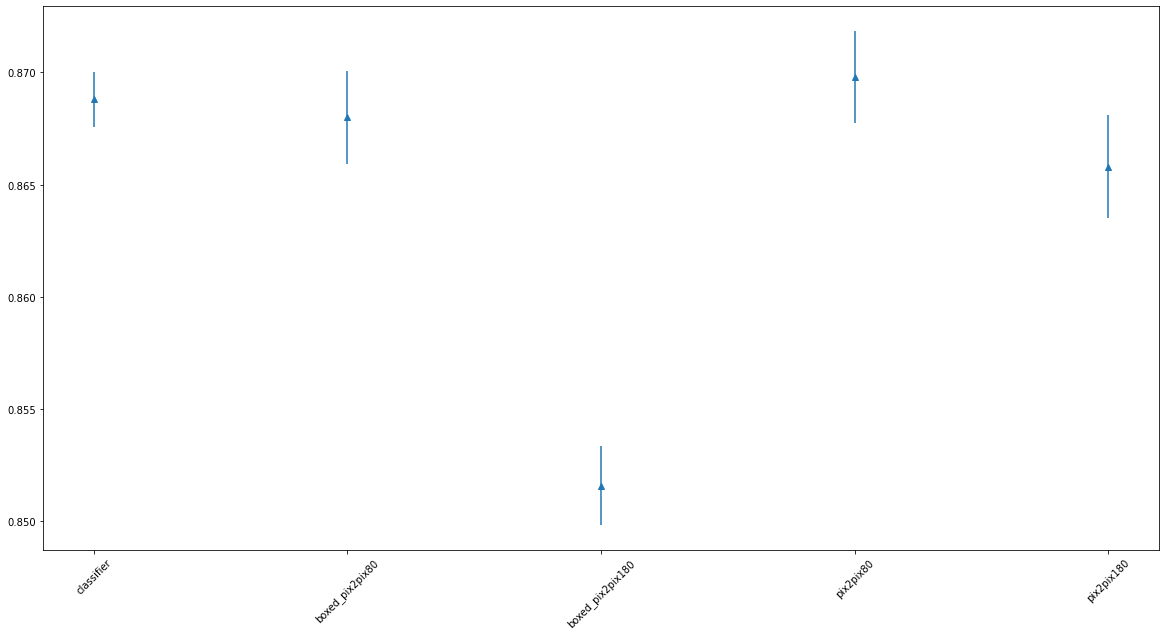

In [95]:
measure_path = ["f1_micro"]
dump_stat(measure_path)

f1_macro
                       avg       var
classifier        0.360902  0.002729
boxed_pix2pix80   0.383456  0.008946
boxed_pix2pix180  0.458045  0.006462
pix2pix80         0.355308  0.005430
pix2pix180        0.441648  0.005407


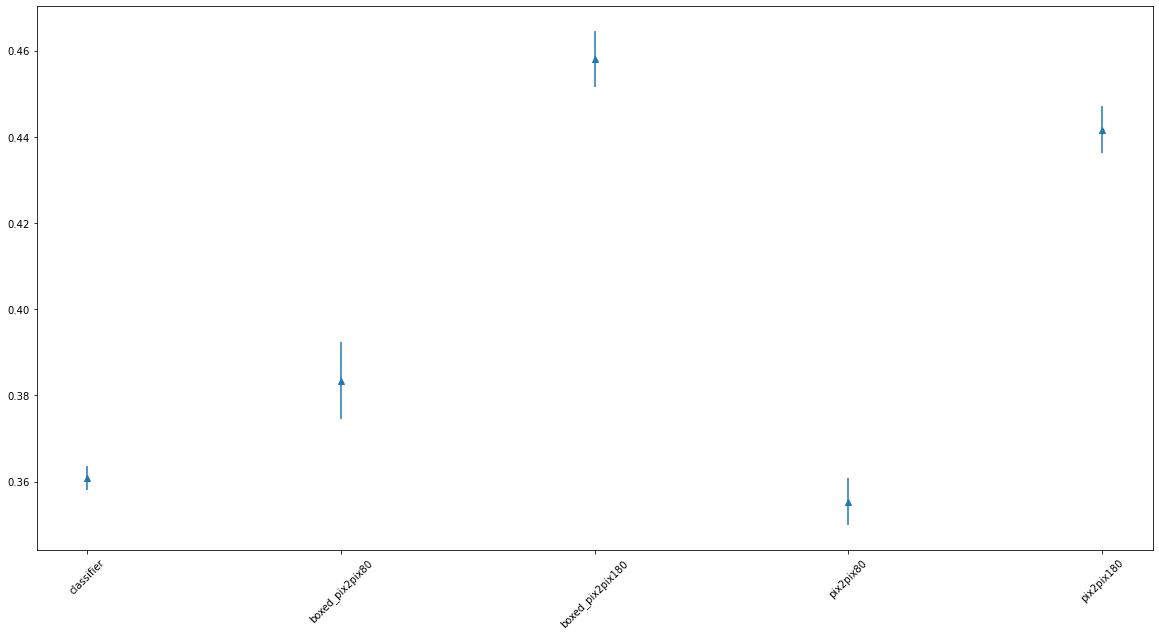

In [96]:
measure_path = ["f1_macro"]
dump_stat(measure_path)

# заболевания f1_binary

globules f1_binary
                       avg       var
classifier        0.434550  0.014880
boxed_pix2pix80   0.435559  0.018222
boxed_pix2pix180  0.422997  0.004217
pix2pix80         0.362929  0.018832
pix2pix180        0.459574  0.012045


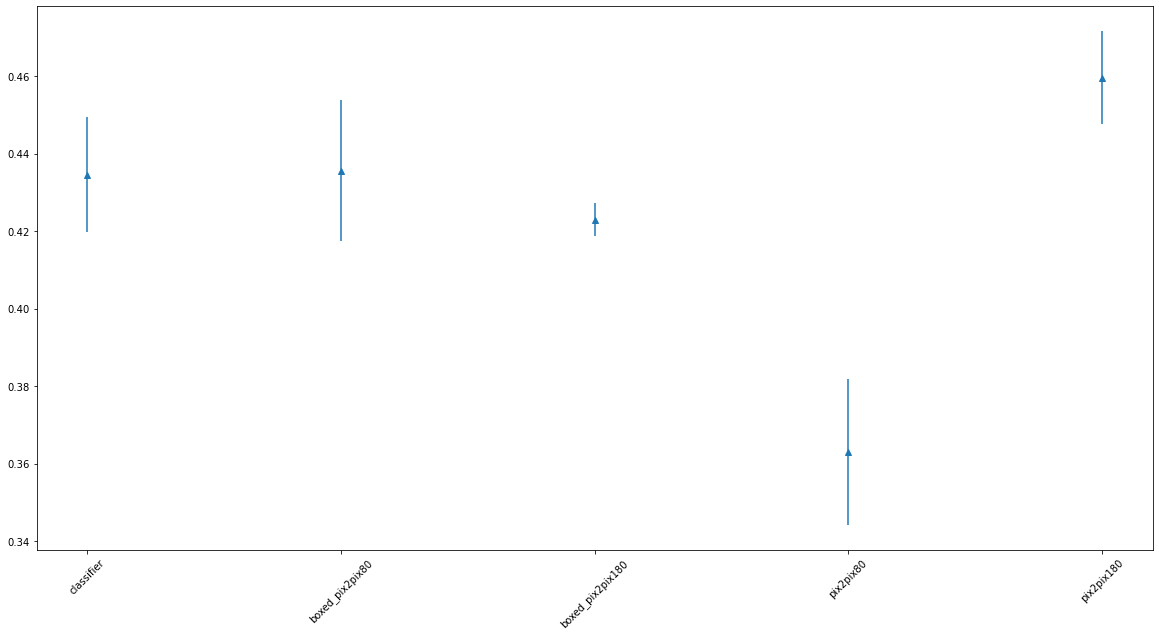

In [97]:
measure_path = ["globules", "f1_binary"]
dump_stat(measure_path)

milia_like_cyst f1_binary
                       avg       var
classifier        0.000000  0.000000
boxed_pix2pix80   0.000000  0.000000
boxed_pix2pix180  0.000000  0.000000
pix2pix80         0.000000  0.000000
pix2pix180        0.022222  0.016667


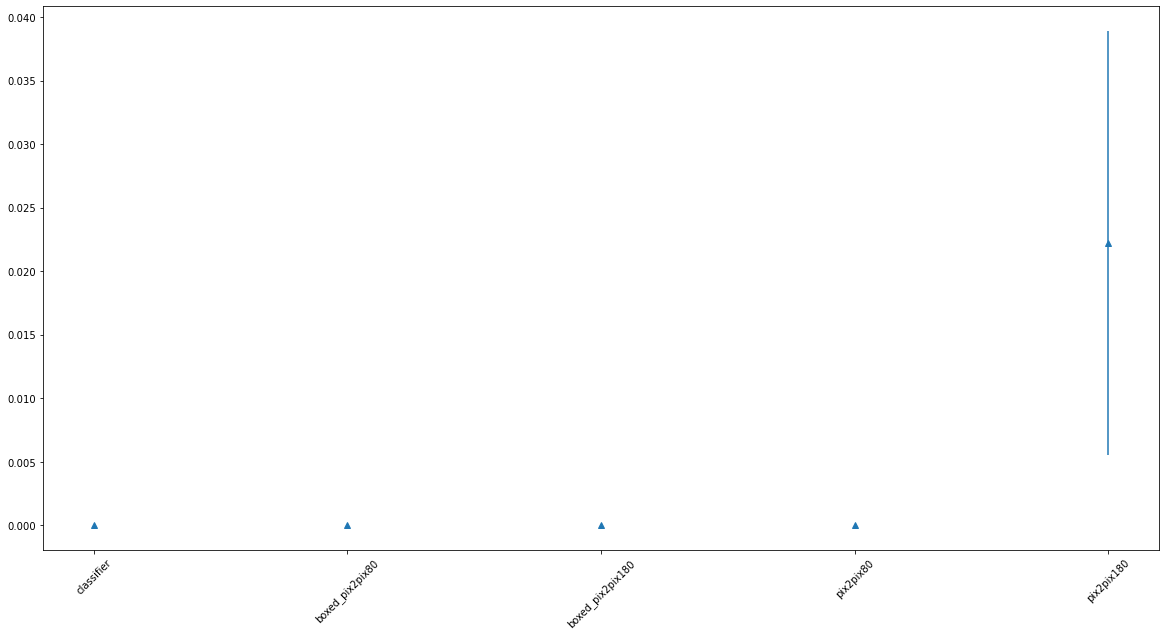

In [98]:
measure_path = ["milia_like_cyst", "f1_binary"]
dump_stat(measure_path)

negative_network f1_binary
                       avg       var
classifier        0.000000  0.000000
boxed_pix2pix80   0.000000  0.000000
boxed_pix2pix180  0.303030  0.031739
pix2pix80         0.000000  0.000000
pix2pix180        0.096364  0.024142


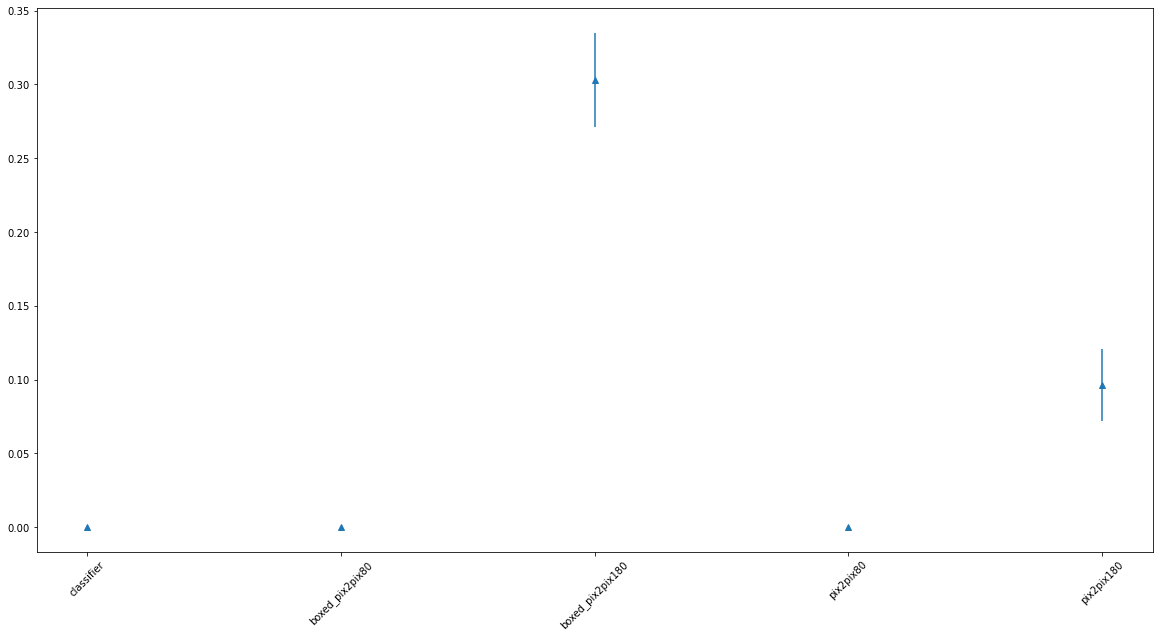

In [99]:
measure_path = ["negative_network", "f1_binary"]
dump_stat(measure_path)

pigment_network f1_binary
                       avg       var
classifier        0.812286  0.003899
boxed_pix2pix80   0.817636  0.005325
boxed_pix2pix180  0.809103  0.003393
pix2pix80         0.821054  0.004944
pix2pix180        0.820988  0.005898


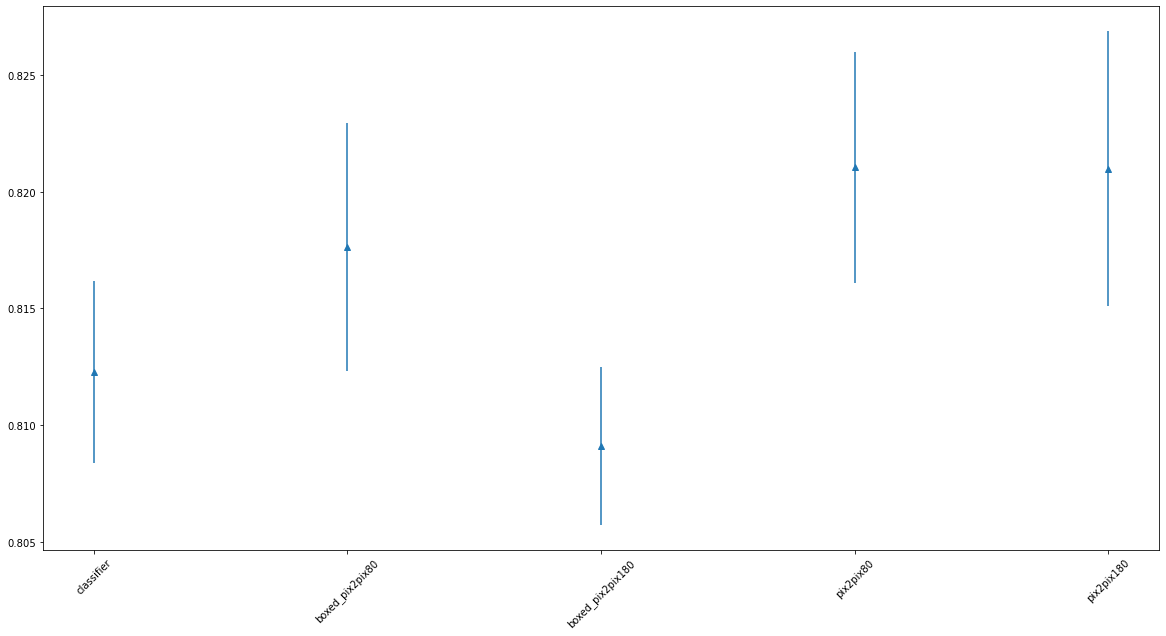

In [100]:
measure_path = ["pigment_network", "f1_binary"]
dump_stat(measure_path)

streaks f1_binary
                       avg       var
classifier        0.000000  0.000000
boxed_pix2pix80   0.130000  0.041533
boxed_pix2pix180  0.307143  0.020140
pix2pix80         0.028571  0.021429
pix2pix180        0.335173  0.025800


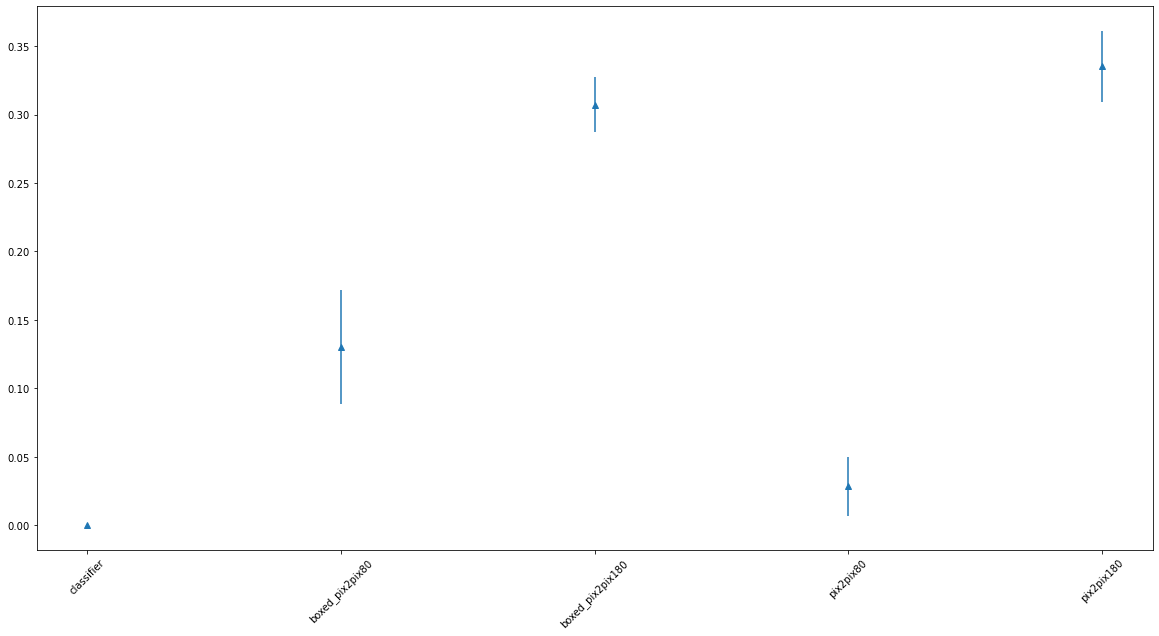

In [101]:
measure_path = ["streaks", "f1_binary"]
dump_stat(measure_path)

# заболевания auc

globules auc
                       avg       var
classifier        0.646394  0.007536
boxed_pix2pix80   0.652437  0.011456
boxed_pix2pix180  0.646394  0.002849
pix2pix80         0.610461  0.008836
pix2pix180        0.666309  0.007184


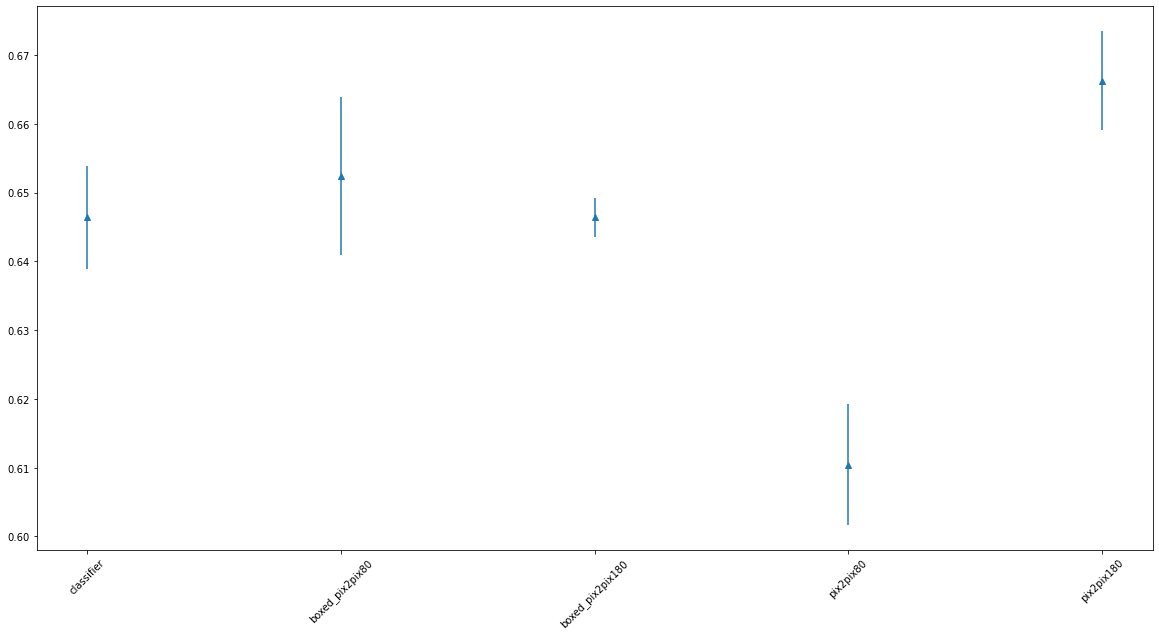

In [102]:
measure_path = ["globules", "auc"]
dump_stat(measure_path)

milia_like_cyst auc
                       avg       var
classifier        0.498404  0.000609
boxed_pix2pix80   0.494681  0.002060
boxed_pix2pix180  0.484043  0.003257
pix2pix80         0.499468  0.000399
pix2pix180        0.506206  0.005566


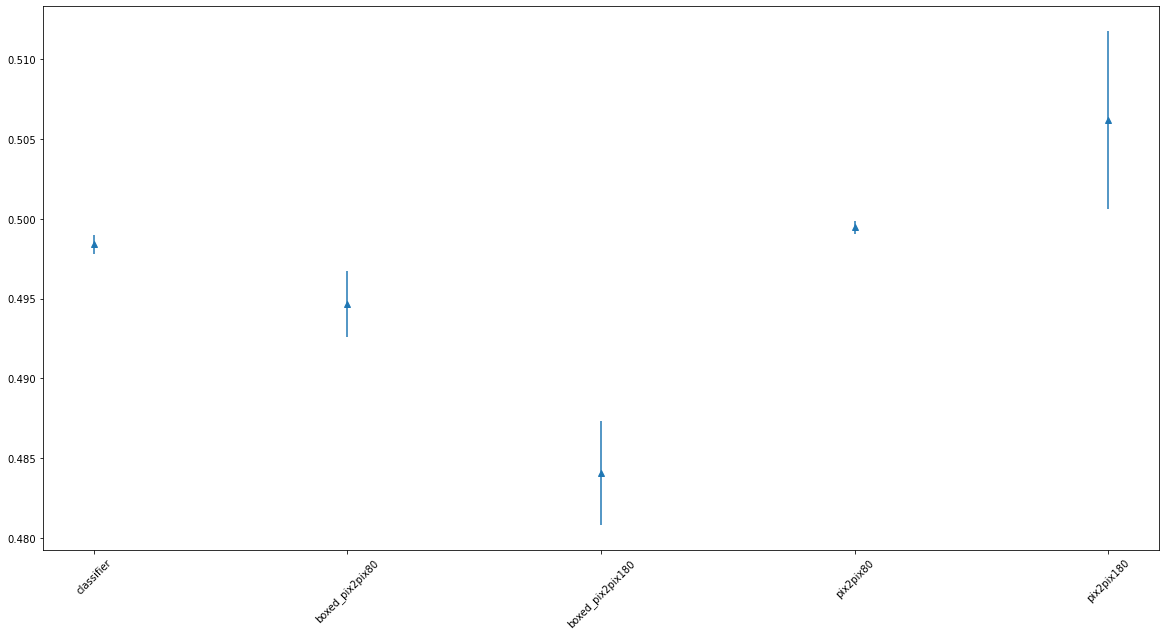

In [103]:
measure_path = ["milia_like_cyst", "auc"]
dump_stat(measure_path)

negative_network auc
                      avg       var
classifier        0.50000  0.000000
boxed_pix2pix80   0.50000  0.000000
boxed_pix2pix180  0.60232  0.014562
pix2pix80         0.50000  0.000000
pix2pix180        0.52558  0.006977


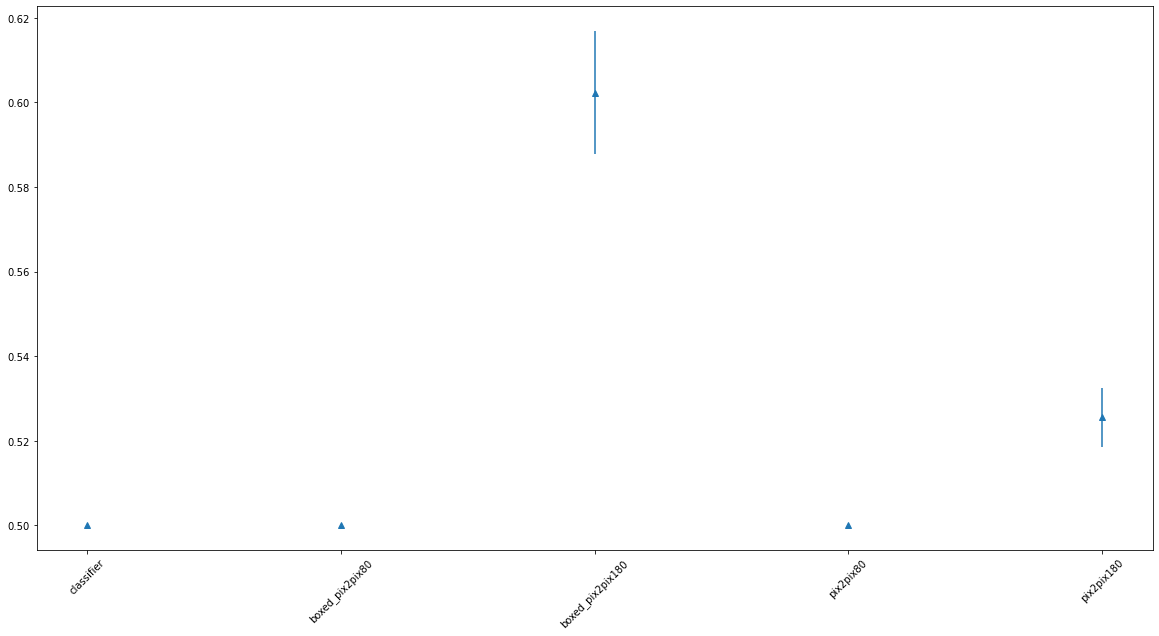

In [104]:
measure_path = ["negative_network", "auc"]
dump_stat(measure_path)

pigment_network auc
                       avg       var
classifier        0.690132  0.007519
boxed_pix2pix80   0.680518  0.007753
boxed_pix2pix180  0.709488  0.004581
pix2pix80         0.691629  0.008330
pix2pix180        0.704186  0.005712


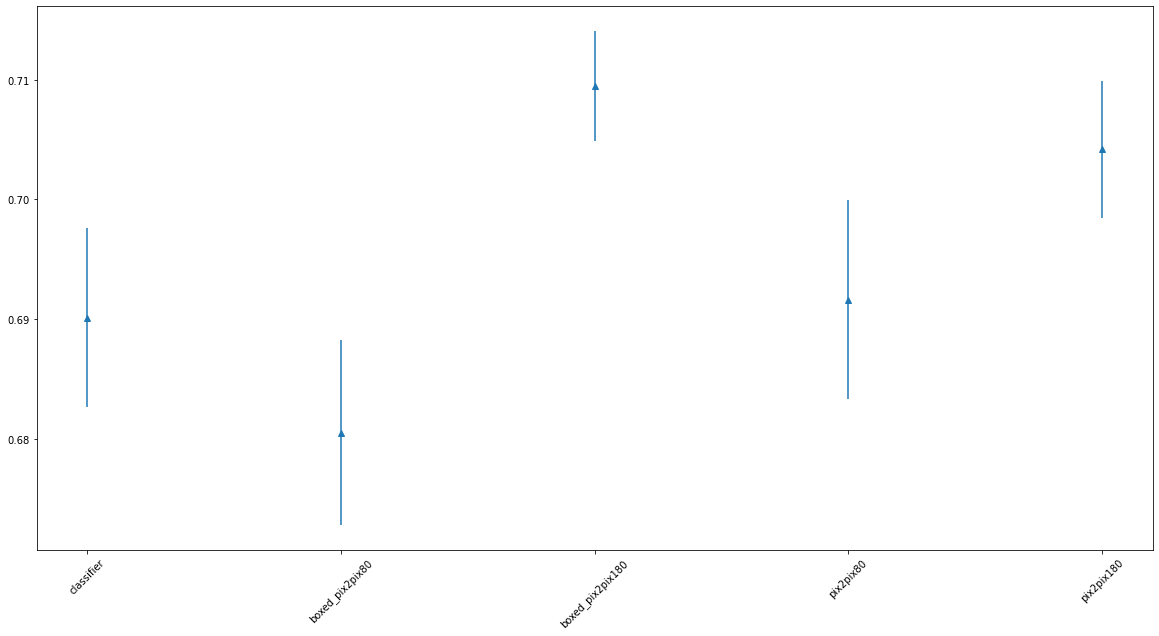

In [105]:
measure_path = ["pigment_network", "auc"]
dump_stat(measure_path)

streaks auc
                       avg       var
classifier        0.500000  0.000000
boxed_pix2pix80   0.546809  0.015603
boxed_pix2pix180  0.608156  0.009856
pix2pix80         0.507801  0.006307
pix2pix180        0.611879  0.010175


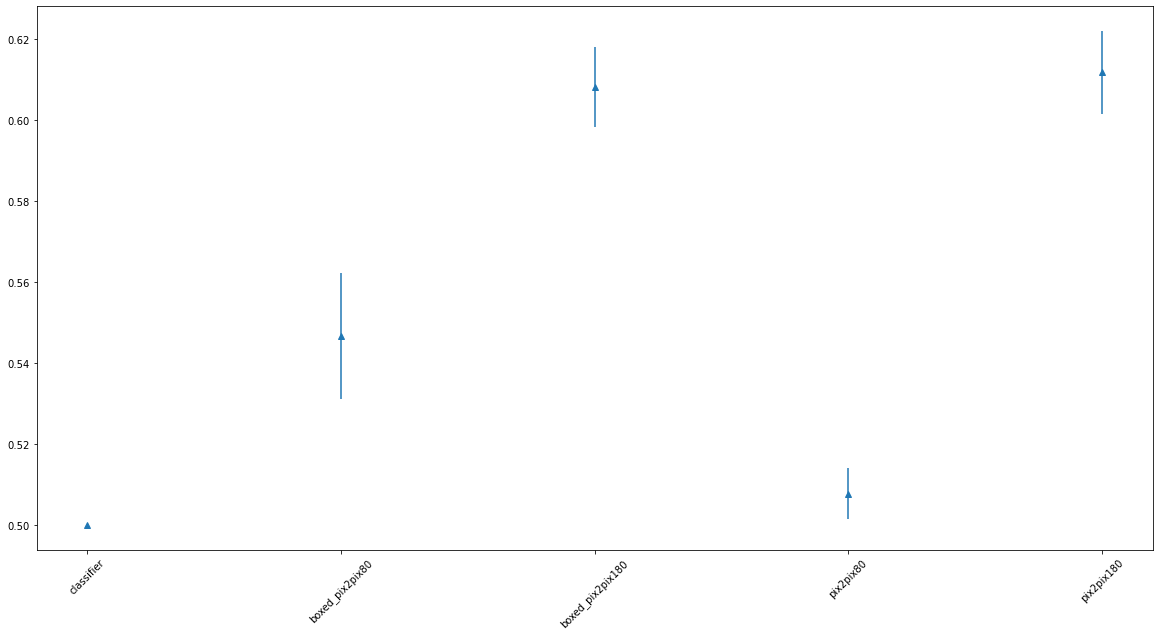

In [106]:
measure_path = ["streaks", "auc"]
dump_stat(measure_path)